=== Handle imports and paths ===

In [2]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
%load_ext autoreload
%autoreload 2

=== Load the trained model ===

In [29]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

<All keys matched successfully>

=== Validate the model on the CN and AD testing sets ===

Cognitively Normal (CN) Subjects


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 7.682 across 1128 observations
Variance and MAE Loss: 108.611 across 1128 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_CN_raw_age_gaps.png
Figure stats: mean = -1.7227107301117173 ; median = -1.5042725107699866 ; std = 6.203043648208301 ; var = 38.477750501577354
Factors: [-0.80490481 59.21785945]
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_CN_corrected_age_gaps.png
Figure stats: mean = -9.69513471534789e-07 ; median = -0.4046447722727393 ; std = 2.9805725895188977 ; var = 8.883812961391389

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg     adj_pval
       G_temporal_inf   rh -6.58 (-8.3

<Figure size 640x480 with 0 Axes>

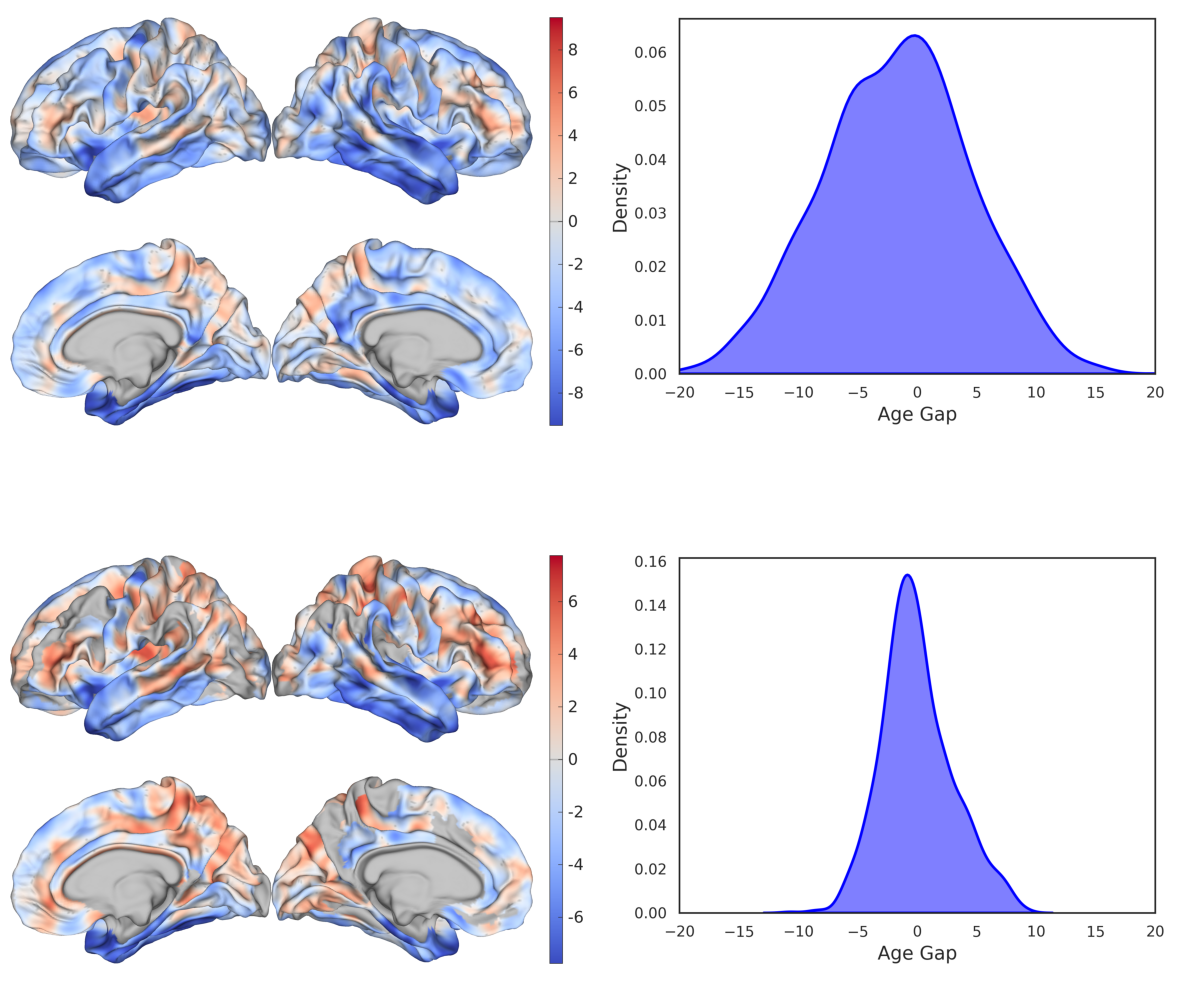

In [43]:
suffix='test_CN'
test_model(X_test_CN, y_test_CN, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=None, global_limits=20)

Alzheimer's Disease (AD) Subjects


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 8.682 across 477 observations
Variance and MAE Loss: 136.340 across 477 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_AD_raw_age_gaps.png
Figure stats: mean = 0.5549297699215127 ; median = -0.21750593907790972 ; std = 8.158867920108715 ; var = 66.56712573777911
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_AD_corrected_age_gaps.png
Figure stats: mean = 2.6083808921494582 ; median = 2.4169310861741877 ; std = 3.3617050806931044 ; var = 11.301061049557832

Top 10 significant age gaps:

                   region hemi     age_gap variance  skew  region_avg     adj_pval
    S_temporal_transverse   lh 6.09 (4.04)    65.29 -0.28        3.95 5.90915

<Figure size 640x480 with 0 Axes>

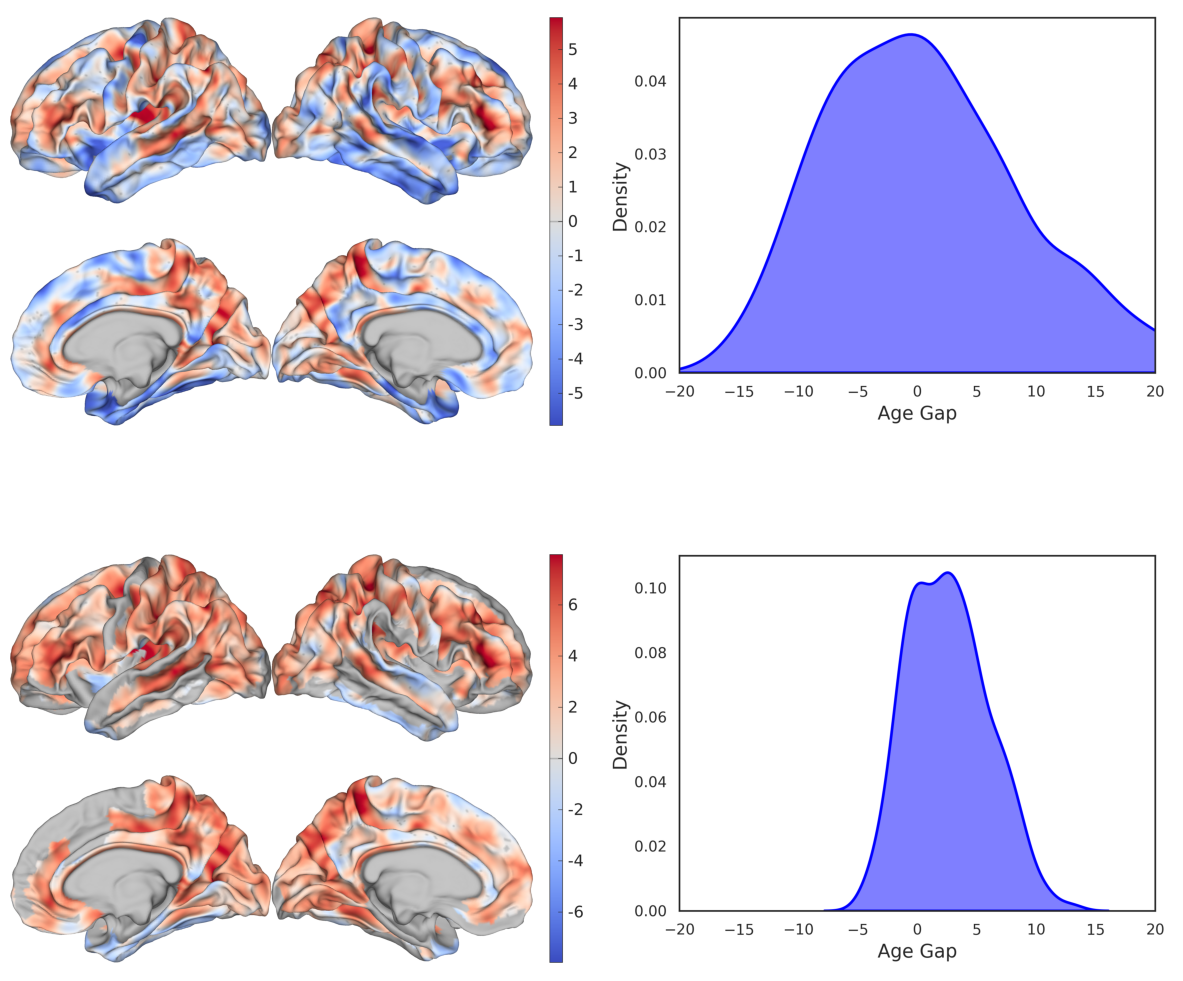

In [44]:
suffix='test_AD'
test_model(X_test_AD, y_test_AD, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'))

View L-BAG difference for CNs and ADs


Top 10 significant age gaps:

               region hemi  age_gap    t_stat      raw_pval  region_avg      adj_pval  significant
       G_temporal_inf   rh 4.876206 70.899914  0.000000e+00    4.358764  0.000000e+00            1
        Pole_temporal   rh 4.841751 71.215449  0.000000e+00    4.676055  0.000000e+00            1
G_temp_sup-Plan_polar   rh 4.513749 18.602201  2.764841e-57    4.230655  4.147261e-57            1
        Pole_temporal   lh 4.510358 35.968426 2.317014e-171    4.676055 1.579782e-170            1
       S_temporal_inf   rh 4.503734 33.536596 6.330287e-142    4.084189 2.792774e-141            1
G_temp_sup-G_T_transv   rh 4.440349 31.123366  8.085902e-97    3.713255  1.925215e-96            1
        S_oc-temp_lat   rh 4.382002 43.638303 2.646252e-173    3.702710 1.984689e-172            1
G_oc-temp_med-Parahip   lh 4.361466 36.369945 2.678086e-193    4.293688 2.510706e-192            1
    G_temporal_middle   rh 4.311656 43.321542 1.384448e-267    4.104474 2.0766

(array([ 1.45660007,  3.55243443,  0.52744323, ..., -0.88309451,
        -0.85079553, -0.75310262]),
 array([-0.51508978,  1.50642536, -1.34538582, ..., -5.82892684,
        -5.43635656, -5.01431477]))

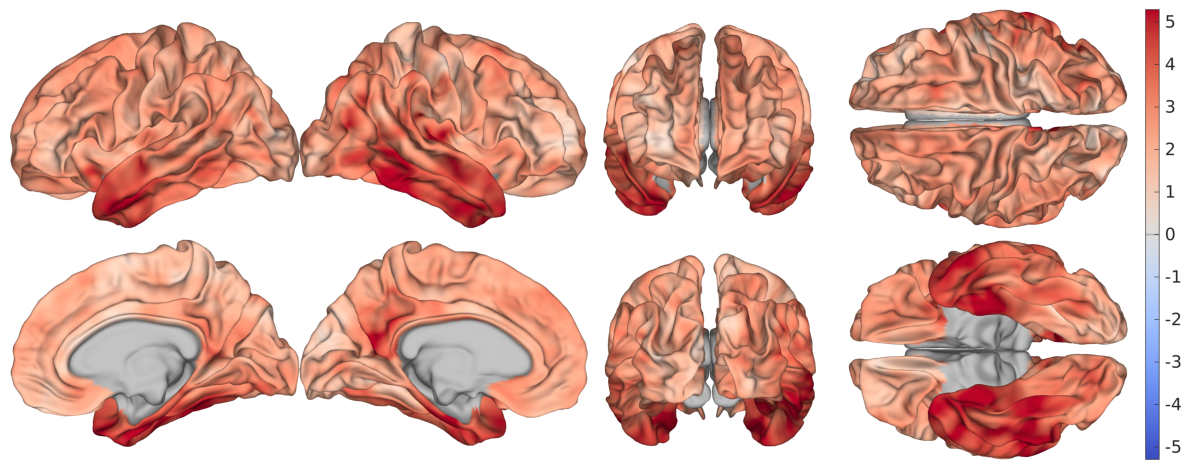

In [6]:
compare_cohorts(suffix='AD-CN', cohort_pred='test_AD', cohort_ref='test_CN') # pred - ref

Display the age gaps of the CN and AD sets

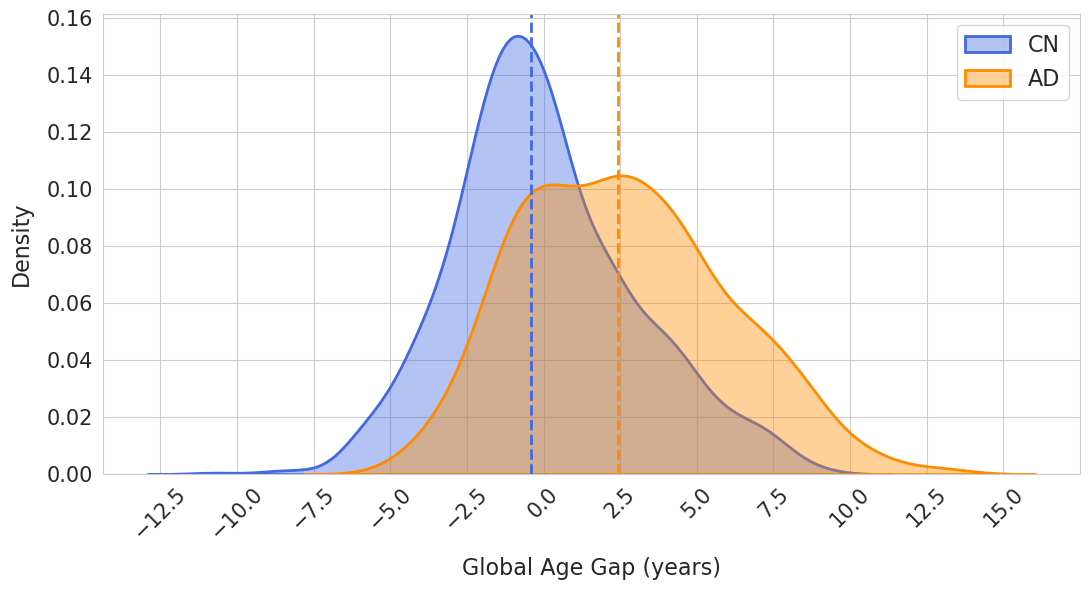

In [4]:
compare_age_gaps(np.load(f'{output_dir}test_CN_corrected_age_gaps.npy'), 
                 'CN',
                 np.load(f'{output_dir}test_AD_corrected_age_gaps.npy'), 
                 "AD")
plt.savefig(f'{output_dir}CN_AD_AGs.png')

Get the region stats, including average age gap, for CNs, ADs, and AD-CNs

In [47]:
print('\n\nCN\n')
show_ranked_differences(suffix='test_CN', output_dir=output_dir)
print('\n\nAD\n')
show_ranked_differences(suffix='test_AD', output_dir=output_dir)
print('\n\nAD-CN\n')
show_ranked_differences(suffix='AD-CN', output_dir=output_dir)



CN


All regions ranked by average age gap:
Region                               Avg Gap   LH Gap   RH Gap
-------------------------------------------------------------------------------------
S_postcentral                           3.17     2.82     3.51 
S_intrapariet_and_P_trans               3.04     3.29     2.78 
S_circular_insula_sup                   2.73     3.28     2.18 
S_front_inf                             2.72     2.07     3.38 
S_orbital_lateral                       2.72     2.88     2.56 
S_cingul-Marginalis                     2.46     1.91     3.01 
S_central                               2.38     2.81     1.94 
S_front_middle                          2.35     1.36     3.34 
Lat_Fis-ant-Horizont                    2.31     2.48     2.15 
S_parieto_occipital                     1.89     1.40     2.38 
S_oc_sup_and_transversal                1.73     1.59     1.88 
Lat_Fis-ant-Vertical                    1.64     2.17     1.10 
S_front_sup                          

=== Determine relationship between brain age gap and cognitive scores ===

Regress global brain age gap and cognitive scores

In [3]:
# Associate regions with colloquial names
regions = {'all' : 'BA'}
global_results, _ = regress_cognitive(data_dir, output_dir, cog_path, test_relations, regions=regions, subset=True, postprocess_obj=postprocess())
global_results.to_csv(f'{output_dir}global_cog_tests.csv')

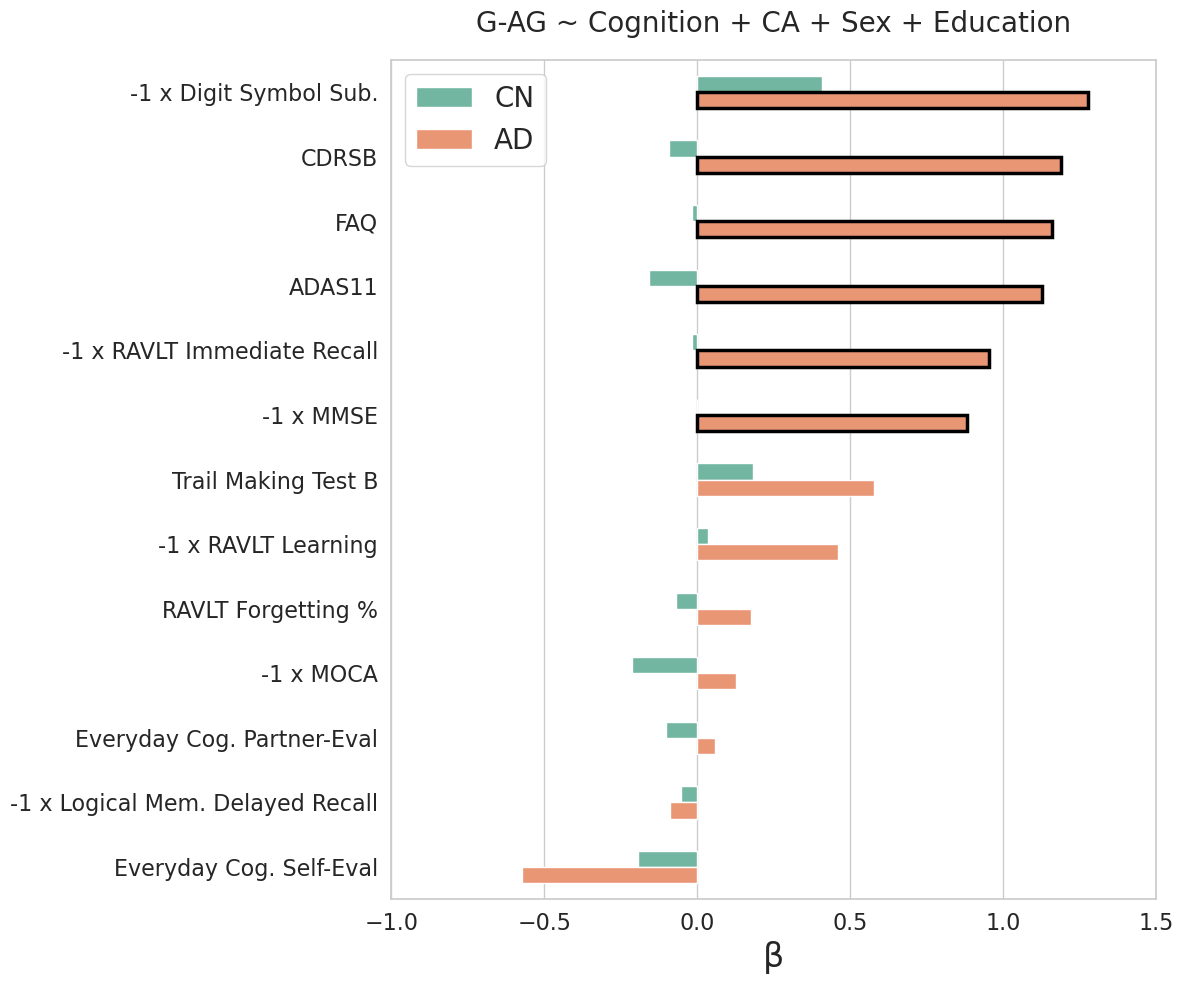

In [4]:
# Load in the global results and add a column for overlap
global_results = pd.read_csv(f'{output_dir}global_cog_tests.csv')

# Replace certain tests to make them more readable
global_results['test'] = global_results['test'].replace({
    'DIGITSCOR': 'Digit Symbol Sub.',
    'RAVLT_immediate': 'RAVLT Immediate Recall',
    'TRABSCOR': 'Trail Making Test B',
    'RAVLT_learning': 'RAVLT Learning',
    'RAVLT_perc_forgetting': 'RAVLT Forgetting %',
    'EcogSPTotal': 'Everyday Cog. Partner-Eval',
    'LDELTOTAL': 'Logical Mem. Delayed Recall',
    'EcogPtTotal': 'Everyday Cog. Self-Eval'
})

# Add negative signs to indicate inversion
global_results.loc[global_results['is_inverted'], 'test'] = '-1 x ' + global_results.loc[global_results['is_inverted'], 'test'].astype(str)

# Set style
sns.set(style='whitegrid')

# Determine how to plot the axes
y_axis = 'test'
x_axis = 'coef'
hue='cohort'

# Sort y-axis by max coef across cohorts
sorted_order = (
    global_results
    .groupby(y_axis)[x_axis]
    .max()
    .sort_values(ascending=False)
    .index
)

# Create the basic plot
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(
    data=global_results,
    y=y_axis,
    x=x_axis,
    hue=hue,
    palette='Set2',
    ax=ax,
    width=0.5,
    order=sorted_order
)

plt.title('G-AG ~ Cognition + CA + Sex + Education', fontsize=20, pad=20)
plt.xlabel('β', fontsize=24)
plt.ylabel('')

plt.legend(fontsize=20)

plt.xlim([-1, 1.5])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Bold significant bars
bold_significant_bars(global_results, plt.gca(), y_axis, hue, hue_order=['CN', 'AD'])

# Save figure
plt.tight_layout()
plt.savefig(f'{output_dir}global_cog_barplot.png', dpi=300)

Regress local BAs for largest AG difference regions

In [5]:
# Get the regression results
local_results, cog_arrays, _ = regress_cognitive(data_dir, output_dir, cog_path, test_relations, 
                                              subset=True, postprocess_obj=postprocess(), 
                                              get_beta_arrays=True, mask_by='adj', pval_thresh=0.05,
                                              partial_region_names=False,
                                              regions=[('all', 'both'), ('Pole_temporal', 'both')])

# Save the df and cog arrays
local_results.to_csv(f'{output_dir}local_cog_tests.csv')
with open(f'{output_dir}cog_test_values/all_cog_arrays.pkl', 'wb') as f: 
    pickle.dump(cog_arrays, f)

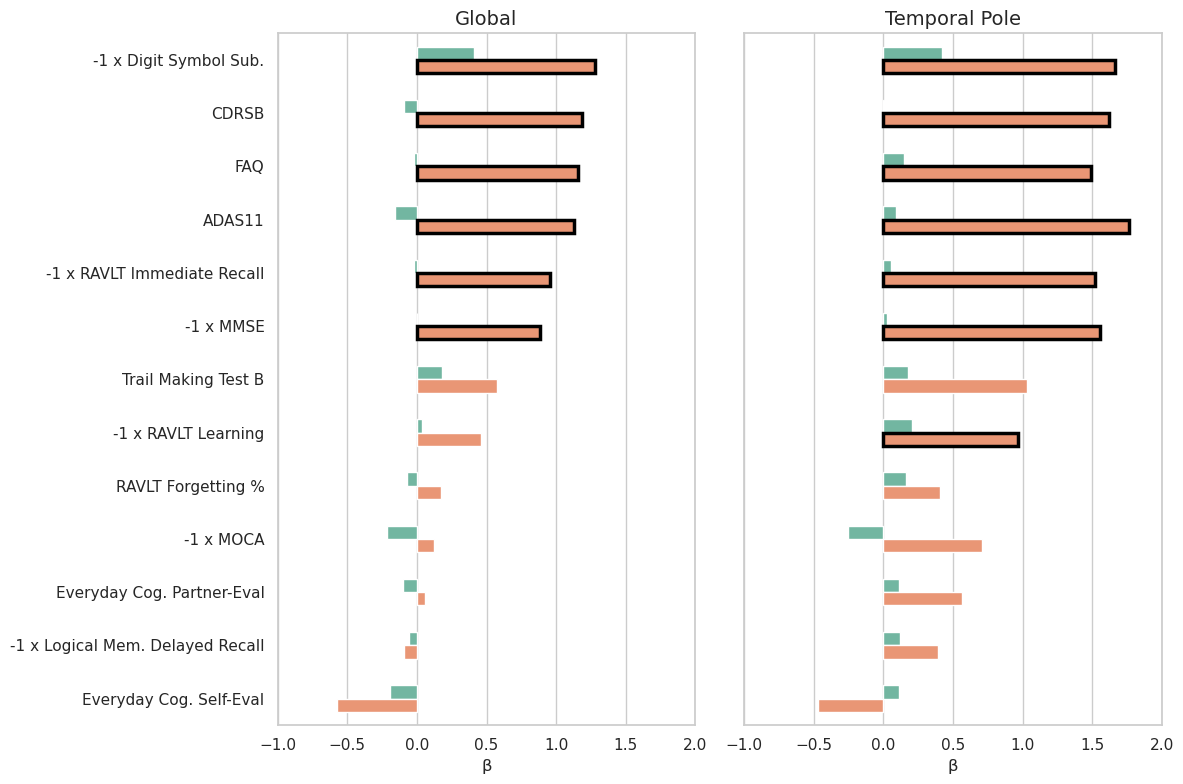

In [6]:
# Load and clean results
local_results = pd.read_csv(f'{output_dir}local_cog_tests.csv')

# Replace certain tests to make them more readable
local_results['test'] = local_results['test'].replace({
    'DIGITSCOR': 'Digit Symbol Sub.',
    'RAVLT_immediate': 'RAVLT Immediate Recall',
    'TRABSCOR': 'Trail Making Test B',
    'RAVLT_learning': 'RAVLT Learning',
    'RAVLT_perc_forgetting': 'RAVLT Forgetting %',
    'EcogSPTotal': 'Everyday Cog. Partner-Eval',
    'LDELTOTAL': 'Logical Mem. Delayed Recall',
    'EcogPtTotal': 'Everyday Cog. Self-Eval'
})

# Replace regions them more readable
local_results['region'] = local_results['region'].replace({
    'Pole_temporal': 'Temporal Pole',
    'G_oc-temp_med-Parahip': 'Parahippocampal Gyrus',
    'G_temporal_inf' : 'Inferior Temporal Gyrus',
    'Front' : 'Frontal',
    'all' : 'Global'
})

# Replace hemis them more readable
local_results['hemi'] = local_results['hemi'].replace({
    'lh': 'Left',
    'rh': 'Right',
})


# Add negative signs to indicate inversion
local_results.loc[local_results['is_inverted'], 'test'] = '-1 x ' + local_results.loc[local_results['is_inverted'], 'test'].astype(str)

# Set style
sns.set(style='whitegrid')

# Get unique region × hemi combinations
region_hemi_combos = local_results[['region', 'hemi']].drop_duplicates()
n_subplots = len(region_hemi_combos)
n_cols = 2
n_rows = (n_subplots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8), sharex=True)
axes = axes.flatten()

for i, ((region, hemi), ax) in enumerate(zip(region_hemi_combos.values, axes)):
    combo_data = local_results[(local_results['region'] == region) & (local_results['hemi'] == hemi)]

    sns.barplot(
        data=combo_data,
        y='test', x='coef', hue='cohort',
        palette='Set2', ax=ax, width=0.5, order=sorted_order
    )
    bold_significant_bars(combo_data, ax, 
                          'test', 'cohort',
                          pval_thresh = 0.05, 
                          hue_order=['CN', 'AD'])

    # Fixed x-axis range
    ax.set_xlim(-1, 2)

    # Title = region + hemisphere
    if hemi == 'both':
        ax.set_title(region, fontsize=14)
    else:
        ax.set_title(f"{region} ({hemi})", fontsize=14)

    # Only show y-ticks on left column
    if i % n_cols != 0:
        ax.set_yticks([])

    # Only show x-tick labels on bottom row
    if i < n_subplots - n_cols:
        ax.tick_params(axis='x', labelbottom=False)

    ax.set_xlabel('β')
    ax.set_ylabel('')
    ax.get_legend().remove()

# Remove any empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

In [18]:
local_results.head(100)
display(local_results.style.hide(axis='index'))

Unnamed: 0,cohort,test,test_n_subjects,region,hemi,coef,raw_pval,r_squared,is_inverted,region_avg,adj_pval
0,CN,ADAS11,ADAS11 (n=361),Global,both,-0.159514,0.327360,0.024215,False,-0.159514,0.654720
1,CN,ADAS11,ADAS11 (n=361),Temporal Pole,both,0.091278,0.671637,0.008513,False,0.091278,0.671637
2,CN,CDRSB,CDRSB (n=356),Global,both,-0.092453,0.551234,0.021771,False,-0.092453,0.991595
3,CN,CDRSB,CDRSB (n=356),Temporal Pole,both,0.002163,0.991595,0.008152,False,0.002163,0.991595
4,CN,-1 x Digit Symbol Sub.,DIGITSCOR (n=118),Global,both,0.407585,0.156674,0.091505,True,0.407585,0.289206
5,CN,-1 x Digit Symbol Sub.,DIGITSCOR (n=118),Temporal Pole,both,0.423438,0.289206,0.076667,True,0.423438,0.289206
6,CN,Everyday Cog. Self-Eval,EcogPtTotal (n=240),Global,both,-0.194788,0.291837,0.035509,False,-0.194788,0.583673
7,CN,Everyday Cog. Self-Eval,EcogPtTotal (n=240),Temporal Pole,both,0.110909,0.636627,0.044567,False,0.110909,0.636627
8,CN,Everyday Cog. Partner-Eval,EcogSPTotal (n=232),Global,both,-0.101055,0.595550,0.031507,False,-0.101055,0.652992
9,CN,Everyday Cog. Partner-Eval,EcogSPTotal (n=232),Temporal Pole,both,0.109333,0.652992,0.039936,False,0.109333,0.652992
